In [9]:
import pandas as pd
from datetime import datetime
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
companies = pd.read_csv('companies.csv')
companies = companies[pd.notnull(companies['founded_at'])]
companies['founded_year']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').year)
year = list(range(companies['founded_year'].min(),companies['founded_year'].max()+1))



In [16]:
# fintech,sailing 
companies = companies[pd.notnull(companies['country_code'])]
usa = companies[companies['country_code']=="USA"]
usa = usa[pd.notnull(usa['category_list'])]
ft_bf2002 = usa[(usa['founded_year'] <= 2002) & (usa['category_list'].str.contains('fintech', case=False))]
ft_af2002 = usa[(usa['founded_year'] > 2002) & (usa['category_list'].str.contains('fintech', case=False))]

In [29]:
def state_data(s,data):
    assert isinstance(s, basestring)
    assert isinstance(df, pd.core.frame.DataFrame)
    
    data = data[pd.notnull(data[s])]
    label = list(data[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(data[s]).count(item))
    
    pair = zip(label,frequency)
    pair.sort(key=lambda x:x[1], reverse=True)
    
    state=list(range(len(pair)))
    num=list(range(len(pair)))
    for i in range(len(pair)):
        state[i] = pair[i][0]
        num[i] = pair[i][1]
    state_df = pd.DataFrame(
    {'state_code': state,
     'number_startups': num,
    })
    
    return(state_df)

In [32]:
init_notebook_mode(connected=True)
df =state_data('state_code',bf2002)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['state_code'],
        z = df['number_startups'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Startups")
        ) ]

layout = dict(
        title = 'US Sailing Community Startups before 2002',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, filename='d3-cloropleth-map' )

In [ ]:
investments = pd.read_csv('investments.csv')
investments = investments[investments['investor_country_code'] == USA]
investments = investments[pd.notnull(investments['investor_state_code'])]

investments = pd.read_csv('investments.csv')
investments = investments[investments['company_country_code'] == USA]
investments = investments[pd.notnull(investments['company_state_code'])]

In [38]:
def funding_type(s,df):
    assert isinstance(s, basestring)
    assert isinstance(df, pd.core.frame.DataFrame)
    
    df = df[pd.notnull(df[s])]
    label = list(df[s].unique())
    frequency = []
    for item in label:
        frequency.append(list(companies[s]).count(item))
    
    pair = zip(label,frequency)
    pair.sort(key=lambda x:x[1], reverse=True)
    
    return(pair)

In [135]:
companies = pd.read_csv('companies.csv')
companies=companies[pd.notnull(companies['name'])]
companies=companies[pd.notnull(companies['founded_at'])]
companies=companies[pd.notnull(companies['funding_rounds'])]
companies=companies[pd.notnull(companies['status'])]
companies=companies[pd.notnull(companies['first_funding_at'])]
companies=companies[pd.notnull(companies['last_funding_at'])]

companies['first_funding_at']=companies['first_funding_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
first = companies['first_funding_at'].apply(lambda x:x.date())
companies['last_funding_at']=companies['last_funding_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
last = companies['last_funding_at'].apply(lambda x:x.date())
companies['founded_at']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
founded = companies['founded_at'].apply(lambda x:x.date())

status = []
for i in companies['status']:
    if i == 'operating':
        status.append('success')
    else:
        status.append('fail')

rounds = list(companies['funding_rounds'])
name = list(companies['name'])
last_first_diff = list(last-first)        
first_found_diff = list(first-founded)

newdf = pd.DataFrame({'name': name})
newdf['status'] = status
newdf['funding_rounds'] = rounds
newdf['days_between_first_last_funding'] = last_first_diff
newdf['days_between_founded_first_funding'] = last_first_diff

#newdf.to_csv('combined.csv',index=False)

In [181]:
import numpy as np
companies = pd.read_csv('companies.csv')
companies=companies[pd.notnull(companies['name'])]
companies=companies[pd.notnull(companies['founded_at'])]
companies=companies[pd.notnull(companies['funding_rounds'])]
companies=companies[pd.notnull(companies['status'])]
companies=companies[companies['funding_total_usd'] != '-']
companies['founded_year']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').year)
companies = companies[(companies['founded_year']>=2005)&(companies['founded_year']<=2010) ]

status = []
for i in companies['status']:
    if i == 'operating':
        status.append('success')
    else:
        status.append('fail')

name = list(companies['name'])
funding = list(companies['funding_total_usd'])
funding = np.array(funding).astype(np.float)
rounds = list(companies['funding_rounds'])
rounds = np.array(rounds).astype(np.float)
analysis = pd.DataFrame({'name': name,'total_funding': funding, 'status':status, 'funding_rounds':rounds})        

In [182]:
analysis.head(3)

,funding_rounds,name,status,total_funding
0,1.0,0-6.com,success,2000000.0
1,1.0,1000 Corks,success,40000.0
2,1.0,1000 Markets,fail,500000.0


Text(0,0.5,'fundings in dollar')

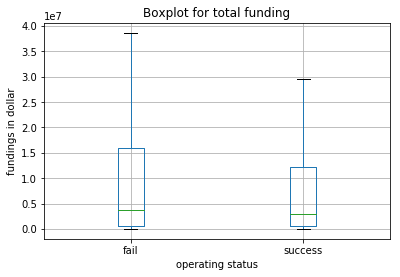

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

bp = analysis.boxplot(column='total_funding',by='status',showfliers=False)
bp.get_figure().suptitle('')
bp.get_figure().gca().set_title('Boxplot for total funding')
bp.get_figure().gca().set_xlabel('operating status')
bp.get_figure().gca().set_ylabel('fundings in dollar')

In [203]:
companies = pd.read_csv('companies.csv')
companies = companies[companies['country_code']== 'USA']
companies=companies[pd.notnull(companies['founded_at'])]
companies=companies[pd.notnull(companies['status'])]
companies['founded_year']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').year)
companies = companies[(companies['founded_year']>=2005)&(companies['founded_year']<=2010)]

label = list(companies['status'].unique())
size = []
for item in label:
    size.append(list(companies['status']).count(item))
    
plot_pie_chart(label, size, 'The status of startups founded between 2005 and 2010 in USA')


In [206]:
companies = pd.read_csv('companies.csv')
companies = companies[companies['country_code'] == 'USA']
companies = companies[companies['status'] == 'operating']
companies = companies[pd.notnull(companies['state_code'])]
companies = companies[pd.notnull(companies['founded_at'])]
companies['founded_year']=companies['founded_at'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d').year)
companies = companies[(companies['founded_year']>=2005)&(companies['founded_year']<=2010)]
state = list(companies['state_code'].unique())
num = []
for item in state:
    num.append(list(companies['state_code']).count(item))

df = pd.DataFrame({'state_code': state,'number_startups': num})
plot_choropleth(df,'startups that founded betweeen 2005 and 2010 in USA which are still operating')

In [215]:
investments = pd.read_csv('investments.csv')
investments = investments[investments['funding_round_type'] == 'venture']
investments = investments[pd.notnull(investments['funding_round_code'])]
label = list(investments['funding_round_code'].unique())
size = []
for item in label:
    size.append(list(investments['funding_round_code']).count(item))
    
plot_pie_chart(label, size, 'The stage of funding by venture investment')

In [217]:
investments = pd.read_csv('investments.csv')
investments = investments[investments['funding_round_type'] == 'venture']
investments = investments[pd.notnull(investments['funding_round_code'])]
investments = investments[pd.notnull(investments['raised_amount_usd'])]

df = investments['raised_amount_usd'].groupby(investments['funding_round_code']).agg('sum')
label = list(df.index)
size = df.tolist()
plot_pie_chart(label, size, 'The amount of funding by stage of venture investment')